In [99]:
import numpy as np
import glob
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.signal import stft, istft

In [100]:
def play_audio(data, rate):
    IPython.display.display(IPython.display.Audio(data=data,rate=rate))

In [101]:
def save_audio(f, save_path):
    sound = AudioSegment(f.astype("int16").tobytes(), sample_width=data.sample_width, frame_rate=fs, channels=data.channels)
    sound.export(save_path, format="mp3")

# 準備

In [102]:
dir_path = "./../sound_dataset/speech_commands_v0.01/"

In [103]:
command_dir_list = glob.glob(dir_path + "*/")
command_list = []
for _dir in command_dir_list:
    command = os.path.basename(_dir[:-1])
    if command[0] is not "_":
        command_list.append(command)

# 発話内容を選択

In [104]:
command = command_list[1]
command

'eight'

In [105]:
path_list = glob.glob(dir_path + command + "/*.wav")
len(path_list)

2352

In [106]:
path = path_list[0]
path

'./../sound_dataset/speech_commands_v0.01/eight/988e2f9a_nohash_0.wav'

# 再生

In [107]:
data = AudioSegment.from_wav(path)

In [108]:
data

In [109]:
path = f"./../../research_blog/01_STFTandiSTFT/eight_original.mp3"

In [110]:
data.export(path, format="mp3")

<_io.BufferedRandom name='./../../research_blog/01_STFTandiSTFT/eight_original.mp3'>

# STFT, spectrogram

In [111]:
fs = data.frame_rate
fs

16000

In [112]:
window_num = 256
stride_num = 128

In [113]:
x = data.get_array_of_samples()

In [114]:
freq, t, F = stft(x, fs=fs, nperseg=window_num, noverlap=(window_num-stride_num))
F_power = 10 * np.log(np.abs(F)) 
F_phase = np.angle(F)
F.shape

(129, 126)

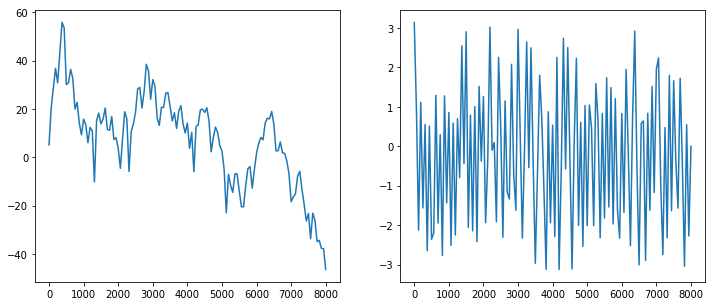

In [115]:
time = 0.5 
num = int(time / (stride_num/fs))
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(freq, F_power[:, num])
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(freq, F_phase[:, num])

Text(0, 0.5, 'frequency')

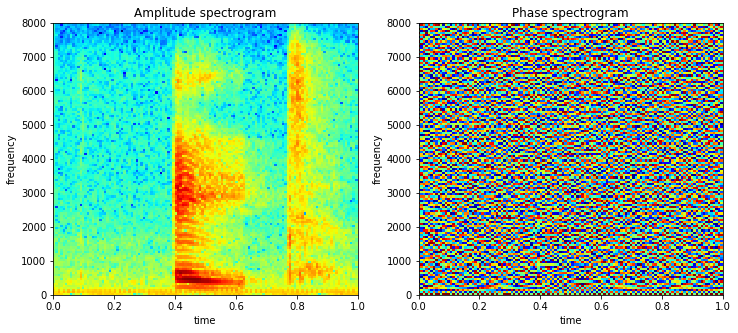

In [120]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.pcolormesh(t, freq, F_power, cmap = 'jet')
ax.set_title("Amplitude spectrogram")
ax.set_xlabel("time")
ax.set_ylabel("frequency")
ax2 = fig.add_subplot(1, 2, 2)
ax2.pcolormesh(t, freq, F_phase, cmap = 'jet')
ax2.set_title("Phase spectrogram")
ax2.set_xlabel("time")
ax2.set_ylabel("frequency")

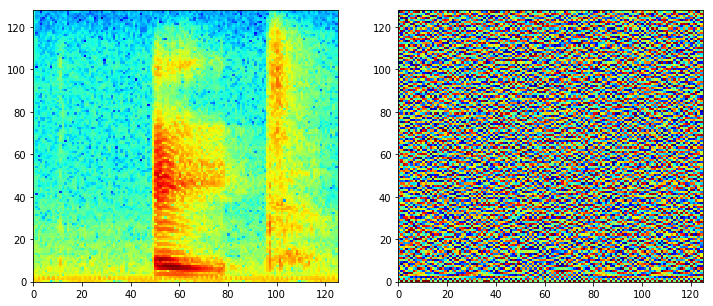

In [49]:
# 入力候補
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.pcolormesh(range(len(t)), range(len(freq)), F_power, cmap = 'jet')
ax2 = fig.add_subplot(1, 2, 2)
ax2.pcolormesh(range(len(t)), range(len(freq)), F_phase, cmap = 'jet')

# iSTFT

In [50]:
_, f = istft(F, fs=fs, nperseg=window_num, noverlap=(window_num-stride_num))

In [51]:
f.shape

(16000,)

In [52]:
IPython.display.Audio(f, rate=fs)

# 位相情報をなくして、iSTFT

In [53]:
F_nophase = np.abs(F)

In [54]:
_, f_nophase = istft(F_nophase, fs=fs, nperseg=window_num, noverlap=(window_num-stride_num))

In [55]:
f_nophase.shape

(16000,)

In [56]:
IPython.display.Audio(f_nophase, rate=fs)

# 位相情報をぐちゃぐちゃにして、iSTFT

In [57]:
power_messy = np.abs(F)

In [58]:
phase_messy = np.random.rand(F.shape[0], F.shape[1]) * 2 * np.pi - np.pi

In [59]:
F_messy = F
for i in range(F_messy.shape[0]):
    for j in range(F_messy.shape[1]):
        power = power_messy[i][j]
        phase = phase_messy[i][j]
        d = np.complex(power*np.cos(phase), power*np.sin(phase))
        F_messy[i][j] = d

In [60]:
np.average(np.abs(F_messy) - power_messy)

-1.3895423e-09

In [61]:
_, f_messy = istft(F_messy, fs=fs, nperseg=window_num, noverlap=(window_num-stride_num))

In [62]:
f_messy.shape

(16000,)

In [63]:
IPython.display.Audio(f_messy, rate=fs)

# 窓幅を変えた時の音声の挙動

In [64]:
r = np.arange(5, 11)
window_num = 2 ** r
stride_num = window_num / 2

In [65]:
print(window_num)
print(stride_num)

[  32   64  128  256  512 1024]
[ 16.  32.  64. 128. 256. 512.]


In [85]:
for i in range(len(r)):
    freq, t, F = stft(x, fs=fs, nperseg=window_num[i], noverlap=(window_num[i]-stride_num[i]))
    _, f = istft(F, fs=fs, nperseg=window_num[i], noverlap=(window_num[i]-stride_num[i]))
    print("normal", window_num[i])
    path = f"./../../research_blog/01_STFTandiSTFT/{command}_normal_{window_num[i]}.mp3"
    play_audio(f, fs)
    save_audio(f, path)

normal 32


normal 64


normal 128


normal 256


normal 512


normal 1024


In [87]:
for i in range(len(r)):
    freq, t, F = stft(x, fs=fs, nperseg=window_num[i], noverlap=(window_num[i]-stride_num[i]))
    F_nophase = np.abs(F)
    _, f_nophase = istft(F_nophase, fs=fs, nperseg=window_num[i], noverlap=(window_num[i]-stride_num[i]))
    print("nophase", window_num[i])
    path = f"./../../research_blog/01_STFTandiSTFT/{command}_nophase_{window_num[i]}.mp3"
    play_audio(f_nophase, fs)
    save_audio(f_nophase, path)

nophase 32


nophase 64


nophase 128


nophase 256


nophase 512


nophase 1024


In [89]:
for k in range(len(r)):
    freq, t, F = stft(x, fs=fs, nperseg=window_num[k], noverlap=(window_num[k]-stride_num[k]))
    power_messy = np.abs(F)
    phase_messy = np.random.rand(F.shape[0], F.shape[1]) * 2 * np.pi - np.pi
    F_messy = F
    for i in range(F_messy.shape[0]):
        for j in range(F_messy.shape[1]):
            power = power_messy[i][j]
            phase = phase_messy[i][j]
            d = np.complex(power*np.cos(phase), power*np.sin(phase))
            F_messy[i][j] = d
    _, f_messy = istft(F_messy, fs=fs, nperseg=window_num[k], noverlap=(window_num[k]-stride_num[k]))
    print("messy", window_num[k])
    path = f"./../../research_blog/01_STFTandiSTFT/{command}_messy_{window_num[k]}.mp3"
    play_audio(f_messy, fs)
    save_audio(f_messy, path)

messy 32


messy 64


messy 128


messy 256


messy 512


messy 1024
